In [1]:
cd

/home/darth


In [3]:
pwd

'/home/darth'

In [5]:
cd Desktop/

/home/darth/Desktop


In [65]:
import scipy as sp
df = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
len(df)


743

In [2]:
x=df[:,0] 
y=df[:,1]

In [3]:
sp.sum(sp.isnan(y))

8

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x=x[~sp.isnan(y)]#dont take the values that has nan in y
y=y[~sp.isnan(y)]

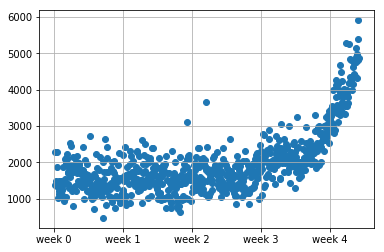

In [11]:
plt.scatter(x,y)
plt.grid()

plt.xticks([w*7*24 for w in range(10)],
['week %i'%w for w in range(10)])
plt.autoscale()

In [43]:
import numpy as np
def error(f,x,y):
    return sp.sum(sp.power((f(x)-y),2))/(2*len(df))

In [68]:
fp1 = sp.polyfit(x, y,2) # best fit for our data where 2 signifies degree of the polyomial that fits the data
                         #and polyfit returns hyperparameters [x**2,x,c] in this case

In [67]:
fp1
f1 = sp.poly1d(fp1)#returns a function of fp1 parameters [x**2 + x + c]
f1

poly1d([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [59]:
error(f1,x,y)

(75694.63855610426+0j)

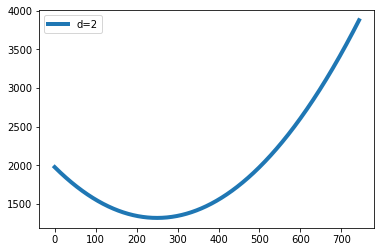

In [69]:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

In [70]:
import seaborn as sn

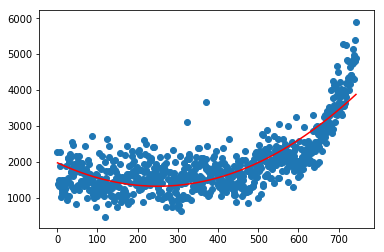

In [76]:
fig, ax = plt.subplots()
# fit = np.polyfit(x, y, deg=1)
ax.plot(x,f1(x), color='red')
ax.scatter(x, y)
